Load the setup code from CY

In [2]:
using PerlaTonettiWaugh, DataFrames
z_min = 0.0 
z_max = 5.0
z_grid = unique([range(0.0, stop = 1.0, length = 500)' range(1.0, stop = 5.0, length = 200)'])
M = length(z_grid)

# Define common objects. 
d_0 = 5
d_T = 2.5019
params = (ρ = 0.02, σ = 3.9896, N = 10, θ = 4.7060, γ = 1.00, κ = 0.0103, ζ = 1, η = 0, Theta = 1, χ = 0.4631, υ = 0.0775, μ = 0, δ = 0.053) # Baselines per Jesse. 
δ = params.δ
# solve for stationary solution at t = 0
params_0 = merge(params, (d = d_0,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T


stationary_sol_0 = stationary_numerical(params_0, z_grid); # solution at t = 0
stationary_sol = stationary_numerical(params_T, z_grid); # solution at t = T
stationary_sol_0_algebraic = stationary_algebraic(params_0)
stationary_sol_algebraic = stationary_algebraic(params_T)

# auxil. function that extracts and displays welfare information from steady state solutions
function display_stationary_sol(stationary_sol)
    @unpack g, z_hat, Ω, π_bar_agg, y, c, λ_ii, U_bar, L_tilde, z_bar, w, x, π_min, r, a, b, S = stationary_sol
    summary_df1 = DataFrame(g = g, z_hat = z_hat, Ω = Ω, π_bar_agg = π_bar_agg, 
                            y = y, c = c, λ_ii = λ_ii)
    summary_df2 = DataFrame(U_bar_0 = U_bar(0.0),
                            L_tilde = L_tilde, z_bar = z_bar, w = w, x = x, π_min = π_min)
    summary_df3 = DataFrame(r = r, a = a, b = b, S = S)
    println(summary_df1)
    println(summary_df2)    
    println(summary_df3)
end;

display_stationary_sol(stationary_sol_0)
display_stationary_sol(stationary_sol)
display_stationary_sol(stationary_sol_0_algebraic)
display_stationary_sol(stationary_sol_algebraic)

1×7 DataFrame
│ Row │ g         │ z_hat   │ Ω       │ π_bar_agg │ y       │ c       │ λ_ii     │
│     │ Float64   │ Float64 │ Float64 │ Float64   │ Float64 │ Float64 │ Float64  │
├─────┼───────────┼─────────┼─────────┼───────────┼─────────┼─────────┼──────────┤
│ 1   │ 0.0037208 │ 3.18731 │ 2.54131 │ 0.277515  │ 1.59929 │ 1.59929 │ 0.990087 │
1×6 DataFrame
│ Row │ U_bar_0 │ L_tilde │ z_bar   │ w        │ x       │ π_min     │
│     │ Float64 │ Float64 │ Float64 │ Float64  │ Float64 │ Float64   │
├─────┼─────────┼─────────┼─────────┼──────────┼─────────┼───────────┤
│ 1   │ 32.7801 │ 0.16733 │ 1.92068 │ 0.481422 │ 1.0     │ 0.0395769 │
1×4 DataFrame
│ Row │ r         │ a       │ b       │ S          │
│     │ Float64   │ Float64 │ Float64 │ Float64    │
├─────┼───────────┼─────────┼─────────┼────────────┤
│ 1   │ 0.0767208 │ 17.4573 │ -11.052 │ -0.0489984 │
1×7 DataFrame
│ Row │ g         │ z_hat   │ Ω       │ π_bar_agg │ y       │ c       │ λ_ii     │
│     │ Float64   │ Float64 │ Flo

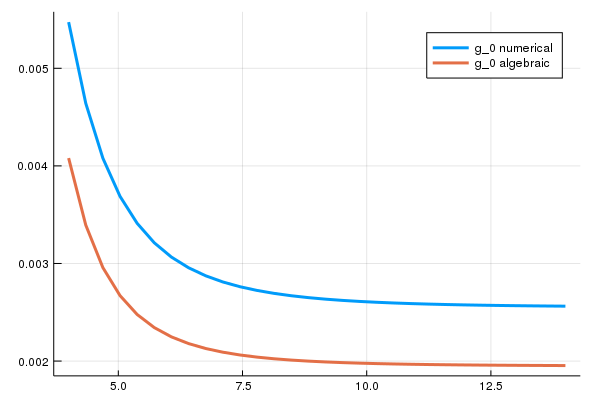

In [19]:
get_g_by_d(d_0) = stationary_numerical(merge(params, (d = d_0,)), z_grid).g
get_g_by_d_algebraic(d_0) = stationary_algebraic(merge(params, (d = d_0,)), z_grid).g

using Plots
gr(fmt=:png)
# initial run
plot(range(4.0, stop = 14.0, length = 30), get_g_by_d, label = "g_0 numerical", lw = 3)
plot!(range(4.0, stop = 14.0, length = 30), get_g_by_d_algebraic, label = "g_0 algebraic", lw = 3)

Let's wrap the above in some functions for different grid

In [40]:
function discrepancy(z_grid)
    # setup objects
    get_g_by_d(d_0) = stationary_numerical(merge(params, (d = d_0,)), z_grid).g
    get_g_by_d_algebraic(d_0) = stationary_algebraic(merge(params, (d = d_0,)), z_grid).g
    d0s = range(4.0, stop = 30.0, length = 30)
    # calculations
    numeric = get_g_by_d.(d0s)
    algebraic = get_g_by_d_algebraic.(d0s)
    return (numeric = numeric, algebraic = algebraic, diff = numeric - algebraic)
end

discrepancy (generic function with 1 method)

In [71]:
using Compat 
z_grids = (
    unique([range(0., 1., length = 1000)' range(1., 2., length = 100)' range(2., 5., length = 50)']),
    unique([range(0., 1., length = 1500)' range(1., 2., length = 100)' range(2., 5., length = 50)']),
    unique([range(0., 1., length = 2500)' range(1., 2., length = 100)' range(2., 5., length = 50)']),
    unique([range(0., 1., length = 3000)' range(1., 2., length = 100)' range(2., 5., length = 50)']),
)
diffs = []
for grid in z_grids 
   sol = discrepancy(grid)
   push!(diffs, sol.diff)
end

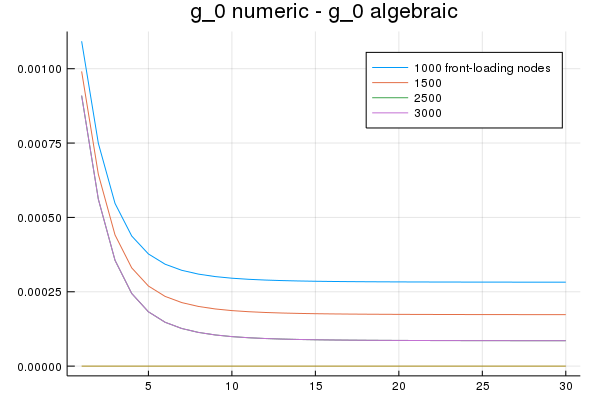

In [73]:
plot(diffs[1], title = "g_0 numeric - g_0 algebraic", label = "1000 front-loading nodes")
plot!(diffs[2], label = "1500")
plot!(diffs[3], label = "2500")
plot!(diffs[3], label = "3000")
plot!(fill(0, size(diffs[1])), label = "")